In [2]:
!pip install tensorflow

In [3]:
!pip install opencv-python

# **Preprocessing**

Class Proportions:
Normal: 3500 Tuberculosis: 700


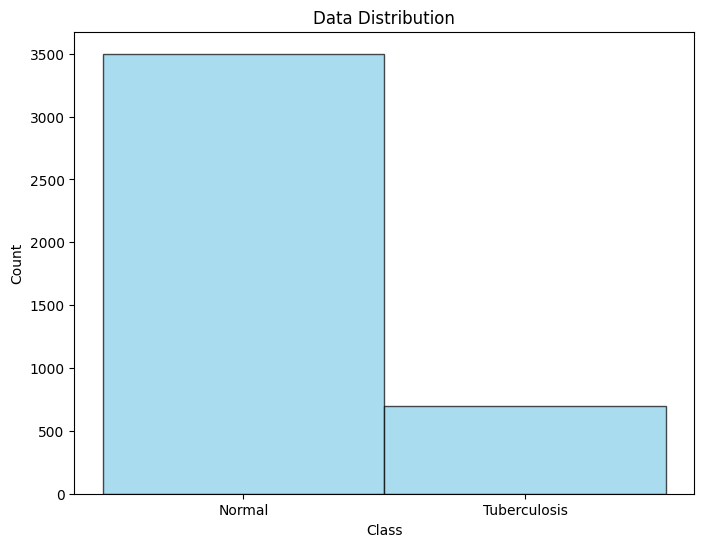

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = r"/content/drive/MyDrive/TB_Chest_Radiography_Database"
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (Normal and Tuberculosis)
for class_name in ['Normal', 'Tuberculosis']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for Normal, 1 for Tuberculosis) to the labels list
        labels.append(0 if class_name == 'Normal' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print class proportions
print("Class Proportions:")
print("Normal:", np.sum(labels == 0), "Tuberculosis:", np.sum(labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Normal', 'Tuberculosis'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()

In [5]:
# from keras.preprocessing.image import ImageDataGenerator

# # Define data augmentation parameters
# datagen = ImageDataGenerator(
#     rotation_range=10,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Count the number of images in each class
# normal_count = np.sum(labels == 0)
# tb_count = np.sum(labels == 1)

# # Calculate the augmentation factor
# augmentation_factor = int(normal_count / tb_count) - 1

# # Augment the images in the Tuberculosis class
# tb_indices = np.where(labels == 1)[0]
# augmented_images = []
# augmented_labels = []
# for index in tb_indices:
#     image = images[index].reshape((1,) + images[index].shape + (1,))
#     for _ in range(augmentation_factor):
#         for batch in datagen.flow(image, batch_size=1):
#             augmented_images.append(batch[0][:, :, 0])  # Remove the extra dimension
#             augmented_labels.append(1)
#             break  # exit the loop after one augmentation

# # Convert augmented_images and augmented_labels to NumPy arrays
# augmented_images = np.array(augmented_images)
# augmented_labels = np.array(augmented_labels)

# # Combine original and augmented data
# balanced_images = np.concatenate((images, augmented_images))
# balanced_labels = np.concatenate((labels, augmented_labels))

# # Shuffle the data
# shuffle_indices = np.random.permutation(len(balanced_images))
# balanced_images = balanced_images[shuffle_indices]
# balanced_labels = balanced_labels[shuffle_indices]

# # Print class proportions after balancing
# print("Class Proportions after balancing:")
# print("Normal:", np.sum(balanced_labels == 0), "Tuberculosis:", np.sum(balanced_labels == 1))
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Assuming 'images' and 'labels' are your original data
# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Count the number of images in each class
normal_count = np.sum(labels == 0)
tb_count = np.sum(labels == 1)

# Calculate the augmentation factor
augmentation_factor = int(normal_count / tb_count) - 1

# Augment the images in the Tuberculosis class
tb_indices = np.where(labels == 1)[0]
augmented_images = []
augmented_labels = []
for index in tb_indices:
    image = images[index].reshape((1,) + images[index].shape + (1,))
    for _ in range(augmentation_factor):
        for batch in datagen.flow(image, batch_size=1):
            augmented_images.append(batch[0][:, :, 0])  # Remove the extra dimension
            augmented_labels.append(1)
            break  # exit the loop after one augmentation

# Convert augmented_images and augmented_labels to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Combine original and augmented data
balanced_images = np.concatenate((images, augmented_images))
balanced_labels = np.concatenate((labels, augmented_labels))

# Shuffle the data
shuffle_indices = np.random.permutation(len(balanced_images))
balanced_images = balanced_images[shuffle_indices]
balanced_labels = balanced_labels[shuffle_indices]

# Print class proportions after balancing
print("Class Proportions after balancing:")
print("Normal:", np.sum(balanced_labels == 0), "Tuberculosis:",np.sum(balanced_labels == 1))

Class Proportions after balancing:
Normal: 3500 Tuberculosis: 3500


In [6]:
# Print total count of images after balancing
print("Total images after balancing:", len(balanced_labels))

# Count the number of images for each class in the final balanced dataset
count_normal = np.sum(balanced_labels == 0)
count_tb = np.sum(balanced_labels == 1)

# Print the count of images for each class
print("Class 0 (Normal):", count_normal)
print("Class 1 (Tuberculosis):", count_tb)


Total images after balancing: 7000
Class 0 (Normal): 3500
Class 1 (Tuberculosis): 3500


Class Proportions before augmentation:
Normal: 3500 Tuberculosis: 700


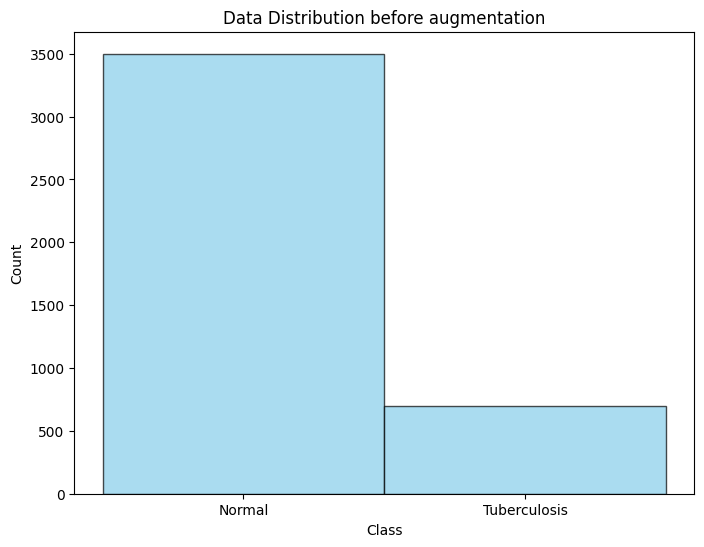

Class Proportions after augmentation:
Normal: 3500 Tuberculosis: 3500


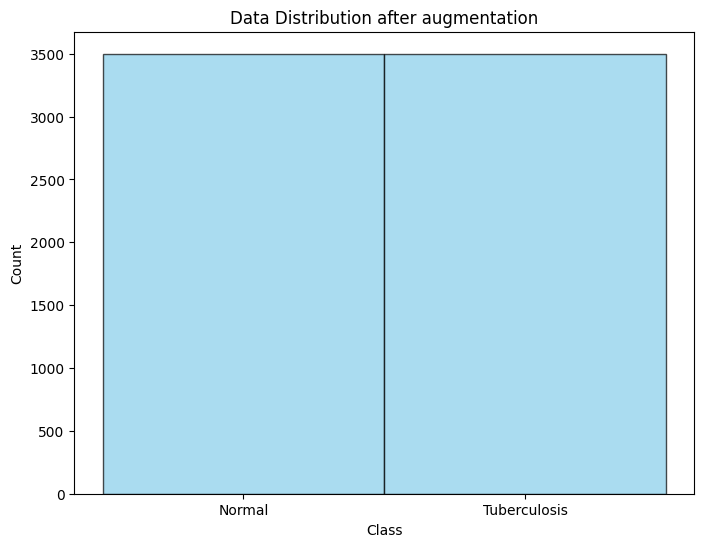

In [7]:
# Print class proportions before augmentation
count_normal = np.sum(labels == 0)
count_tb = np.sum(labels == 1)
print("Class Proportions before augmentation:")
print("Normal:", count_normal, "Tuberculosis:", count_tb)

# Plot histogram for class distribution before augmentation
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Normal', 'Tuberculosis'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution before augmentation')
plt.show()

# Print class proportions after augmentation
print("Class Proportions after augmentation:")
print("Normal:", count_normal, "Tuberculosis:", np.sum(balanced_labels == 1))


# Plot histogram for class distribution after augmentation
plt.figure(figsize=(8, 6))
plt.hist(balanced_labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Normal', 'Tuberculosis'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution after augmentation')
plt.show()


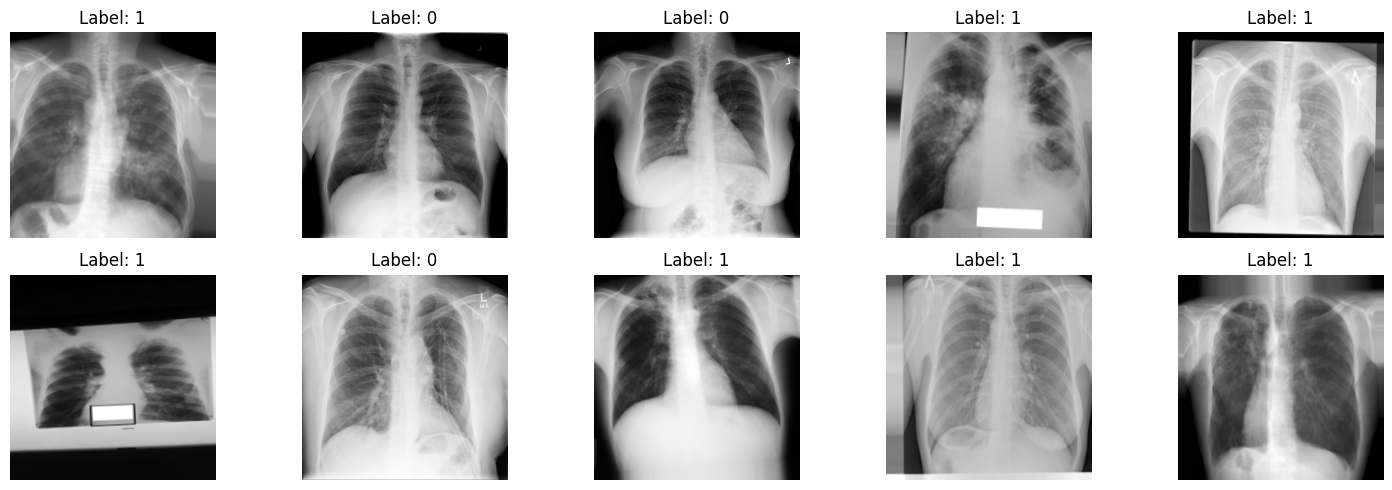

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i % 5 + 1 + (i // 5) * 5)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

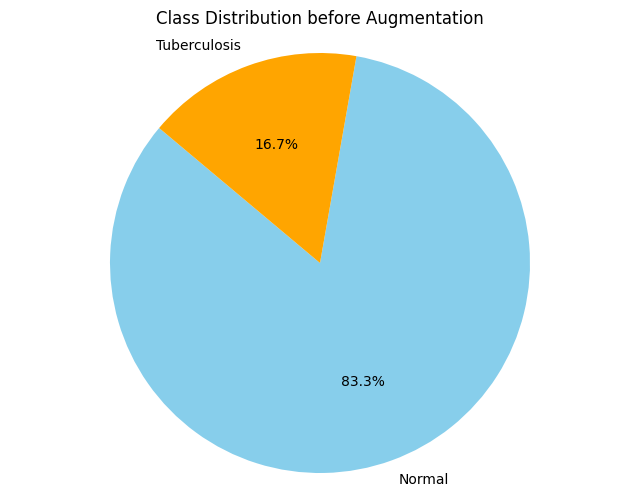

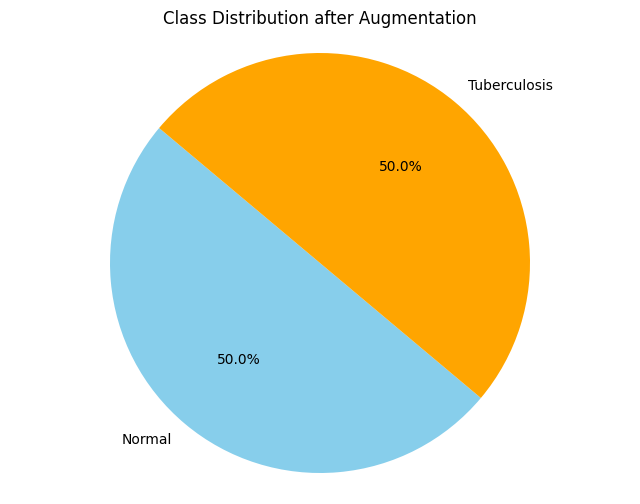

In [9]:
# Define the class labels and colors
labels = ['Normal', 'Tuberculosis']
colors = ['skyblue', 'orange']

# Define the data for the pie chart before augmentation
before_augmentation_data = [count_normal, count_tb]

# Plot the pie chart for the class distribution before augmentation
plt.figure(figsize=(8, 6))
plt.pie(before_augmentation_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Class Distribution before Augmentation')
plt.show()

# Count the number of images for each class in the final balanced dataset
count_normal = np.sum(balanced_labels == 0)
count_tb = np.sum(balanced_labels == 1)

# Define the data for the pie chart after augmentation
after_augmentation_data = [count_normal, count_tb]

# Plot the pie chart for the class distribution after augmentation
plt.figure(figsize=(8, 6))
plt.pie(after_augmentation_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Class Distribution after Augmentation')
plt.show()


In [10]:
import numpy as np
import random
from sklearn.model_selection import train_test_split

# Assuming balanced_images and balanced_labels are arrays containing the images and labels
# Find the indices of 'Normal' and 'Tuberculosis' images

# Count the number of images for each class in the final balanced dataset
normal_indices = np.where(balanced_labels == 0)[0]
tuberculosis_indices = np.where(balanced_labels == 1)[0]

# Randomly select 500 images from each class
num_images_per_class = 1500
selected_indices = np.concatenate([np.random.choice(normal_indices, num_images_per_class, replace=False),
                                    np.random.choice(tuberculosis_indices, num_images_per_class, replace=False)])

# Use the selected indices to extract images and labels
selected_images = balanced_images[selected_indices]
selected_labels = balanced_labels[selected_indices]

# Split the selected dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_images, selected_labels, test_size=0.3, random_state=42)

# Add a channel dimension to the images if they are grayscale
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

# Calculate the total number of images and labels for each class before and after splitting
total_normal_before_split = len(normal_indices)
total_tuberculosis_before_split = len(tuberculosis_indices)
total_images_before_split = total_normal_before_split + total_tuberculosis_before_split

total_normal_after_split = np.sum(y_train == 0) + np.sum(y_test == 0)
total_tuberculosis_after_split = np.sum(y_train == 1) + np.sum(y_test == 1)
total_images_after_split = total_normal_after_split + total_tuberculosis_after_split

# Print the results
print("Total 'Normal' images before splitting:", total_normal_before_split)
print("Total 'Tuberculosis' images before splitting:", total_tuberculosis_before_split)

print("Total images before splitting:", total_images_before_split)

print("\nTotal 'Normal' images after splitting:", total_normal_after_split)
print("Total 'Tuberculosis' images after splitting:", total_tuberculosis_after_split)

print("Total images after splitting:", total_images_after_split)

# Print the shapes of the training and testing sets
print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Total 'Normal' images before splitting: 3500
Total 'Tuberculosis' images before splitting: 3500
Total images before splitting: 7000

Total 'Normal' images after splitting: 1500
Total 'Tuberculosis' images after splitting: 1500
Total images after splitting: 3000

Training set shape: (2100, 224, 224, 1) (2100,)
Testing set shape: (900, 224, 224, 1) (900,)


# MobileNet (A) + Attention Mechanism + Dense Layers (B):
   - Base Model (A): Pre-trained MobileNet.
   - Main Model (B): Attention mechanism followed by dense layers.
   - Explanation: Use the pre-trained MobileNet for feature extraction, apply an attention mechanism to focus on important regions of      the image, and add dense layers for classification.

# Attention mechanism
An attention mechanism is a technique used in deep learning to improve the performance of models, especially in tasks involving sequential data or images with spatial relationships. It allows the model to focus on specific parts of the input, giving more weight to important features while ignoring irrelevant ones.

In the above code, the attention mechanism is applied after the GlobalAveragePooling2D layer. Here's how it works:

1. The output of the GlobalAveragePooling2D layer is reshaped to a 3D tensor to prepare it for the attention mechanism.
2. The reshaped tensor is passed through a dense layer with a softmax activation function. This layer calculates attention weights for each element in the tensor, indicating the importance of each feature.
3. The attention weights are multiplied element-wise with the original tensor, focusing more on important features and less on irrelevant ones.
4. Finally, the resulting tensor is summed along the time axis to obtain a single vector, which is then passed to the dense layers for classification.

In summary, the attention mechanism helps the model focus on relevant features in the input data, potentially improving its performance in tasks like image classification.


The attention mechanism is used in deep learning models for several reasons:

1. **Improving Model Performance**: Attention mechanisms allow models to focus on relevant parts of the input data while ignoring irrelevant parts. This can lead to improved performance, especially in tasks where certain parts of the input are more important than others.

2. **Handling Variable-Length Inputs**: In tasks involving sequential data, such as natural language processing (NLP) or time series prediction, input sequences may vary in length. Attention mechanisms provide a way to selectively attend to different parts of the sequence, regardless of its length, enabling the model to effectively process variable-length inputs.

3. **Capturing Contextual Information**: Attention mechanisms enable the model to capture contextual information by assigning different weights to different parts of the input data. This allows the model to consider the context surrounding each element in the input sequence, leading to more accurate predictions.

4. **Interpretable Models**: Models with attention mechanisms are often more interpretable because they provide insights into which parts of the input are being attended to. This can be useful for understanding the model's decision-making process and for debugging model behavior.

Overall, attention mechanisms are valuable tools for enhancing the performance, flexibility, and interpretability of deep learning models, particularly in tasks involving sequential data or complex input structures.

In [11]:
pip install tf2onnx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 50.8 MB/s eta 0:00:00


17225924/17225924 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)         128       ['conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 conv1_relu (ReLU)           

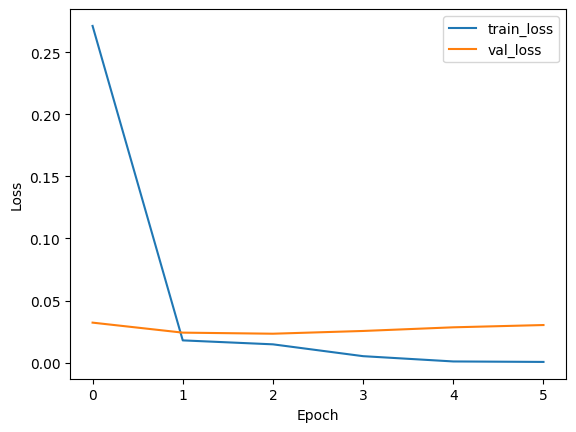

29/29 [==============================] - 1s 39ms/step - loss: 0.0233 - accuracy: 0.9911
Test Accuracy: 99.11%
29/29 [==============================] - 2s 40ms/step

Confusion Matrix:
[[458   3]
 [  5 434]]

Precision: 0.9931350114416476
Recall: 0.9886104783599089
F1 Score: 0.9908675799086758
ROC AUC Score: 0.9910514430845098
Cohen's Kappa Coefficient: 0.9822096591667202
Matthews Correlation Coefficient: 0.9822193738624457
Balanced Accuracy: 0.9910514430845098
Time taken: 55.00 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score,
                             roc_auc_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score)
import tensorflow.keras.backend as K
import cv2
import time
import tensorflow as tf
import tf2onnx

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNet

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add Attention Mechanism
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for attention mechanism
attention_probs = Dense(np.prod(x.shape[2:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)  # Sum along the time axis

# Add Dense Layers for Classification
x = Dense(512, activation='relu')(attention_mul)
output = Dense(1, activation='sigmoid')(x)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Calculate additional metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient:", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Create a dictionary to store metrics
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Correlation Coefficient': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Time taken (seconds)': [end_time - start_time]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics7.csv', index=False)

# Save the model in Keras HDF5 format
model.save('model.h5')

# Save the model in TensorFlow SavedModel format
model.save('saved_model/')

# Save the model in ONNX format
# Convert the model
spec = (tf.TensorSpec((None, 224, 224, 3), tf.float32, name="input"),)
output_path = "model.onnx"
model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13)
with open(output_path, "wb") as f:
    f.write(model_proto.SerializeToString())

# Save the model in TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


In [15]:
import shutil
from google.colab import files
shutil.make_archive('saved_model', 'zip', 'saved_model')
files.download('saved_model.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
files.download('model.tflite')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>